## Linear Regression with threshold optimization
Need to add crossvalidation

In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot

In [2]:
df = utils.get_dataset()

In [3]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [4]:
df = preprocessing.impute_income_KNN(df)

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
%%capture
X,y = utils.X_y_split(df)

y_predicted = utils.cross_validation_average_results(model, X, y, n_splits=5,scaler=scaler)

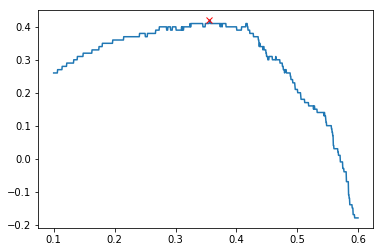

In [8]:
threshold = utils.max_threshold(y_predicted, y, threshold_range = (0.1, 0.6),iterations=1000, visualization=True)

In [9]:
y_pred = utils.predict_with_threshold(y_predicted,threshold)
print("Profit:", utils.profit_share(y_pred, y))

Profit: 0.42
